# Programa Ingenias+ Data Science

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
import sklearn

In [ ]:
# Chequeamos nuestra version
sklearn.__version__

'1.6.1'

In [ ]:
url = 'https://raw.githubusercontent.com/valentinafalco/ProyectoFinal-DS-YPF/main/2da%20PreEntrega/rendimientos-hospitalarios_2005-2022.csv'

#AL LEER EL ARCHIVO ENCONTRAMOS QUE LA LINEA 988 TIENE UNA CANTIDAD INCONSISTENTE DE DATOS, UNA DE LAS COLUMNAS TIENE UN DELIMITADOR ERRONEO
# SOLUCION:
# sep=';'o sep='\t': El código ahora incluye otros delimitadores como ';'.
# on_bad_lines='skip'Este argumento indica al analizador que omita las líneas que causan errores durante el análisis. Es útil para gestionar situaciones en las que algunas líneas tienen formatos inesperados y no se desea que detengan todo el proceso de carga .

archivo = pd.read_csv(url, sep=';', on_bad_lines='skip')

# Alternatively, specify the 'error_bad_lines=False' to skip problematic lines
# rendimientos_hospitalarios = pd.read_csv(url, error_bad_lines=False)

# Inspect the data after loading to identify and address the specific issue
archivo.head()

,anio,region_sanitaria,municipio_id,municipio_nombre,establecimiento_id,establecimiento_nombre,dependencia,consultas_odontologicas,consultas_medicas,consultas_paramedicas,...,egresos,dias_camas_disponible,promedio_camas_disponibles,pacientes_dias,porcentaje_ocupacion,dias_estadia,promedio_dias_estadia,defunciones,giro_de_camas,tasa_mortalidad_hospitalaria
0,2005,I,60007,Adolfo Alsina,NaN,Hospital Local General José de San Martín,Municipal,6424.0,94401.0,18888.0,...,1474.0,10963.0,30.0,4798.0,44.0,4529.0,3.0,42.0,49.0,3.0
1,2005,I,60007,Adolfo Alsina,NaN,Hospital Dr. Noe Yarcho,Municipal,4493.0,18370.0,4459.0,...,471.0,10950.0,30.0,2184.0,20.0,2027.0,4.0,20.0,16.0,4.0
2,2005,I,60007,Adolfo Alsina,NaN,Hogar de Ancianos General N. Levalle,Municipal,0.0,0.0,0.0,...,2.0,12740.0,35.0,11371.0,89.0,848.0,424.0,1.0,0.0,50.0
3,2005,I,60007,Adolfo Alsina,NaN,Hospital Demetrio Carmelo Loyarte,Municipal,0.0,2024.0,846.0,...,120.0,6570.0,18.0,278.0,4.0,279.0,2.0,1.0,7.0,1.0
4,2005,I,60007,Adolfo Alsina,NaN,Unidad Sanitaria San Miguel Arcangel,Municipal,3086.0,2196.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
archivo.head()

,anio,region_sanitaria,municipio_id,municipio_nombre,establecimiento_id,establecimiento_nombre,dependencia,consultas_odontologicas,consultas_medicas,consultas_paramedicas,...,egresos,dias_camas_disponible,promedio_camas_disponibles,pacientes_dias,porcentaje_ocupacion,dias_estadia,promedio_dias_estadia,defunciones,giro_de_camas,tasa_mortalidad_hospitalaria
0,2005,I,60007,Adolfo Alsina,NaN,Hospital Local General José de San Martín,Municipal,6424.0,94401.0,18888.0,...,1474.0,10963.0,30.0,4798.0,44.0,4529.0,3.0,42.0,49.0,3.0
1,2005,I,60007,Adolfo Alsina,NaN,Hospital Dr. Noe Yarcho,Municipal,4493.0,18370.0,4459.0,...,471.0,10950.0,30.0,2184.0,20.0,2027.0,4.0,20.0,16.0,4.0
2,2005,I,60007,Adolfo Alsina,NaN,Hogar de Ancianos General N. Levalle,Municipal,0.0,0.0,0.0,...,2.0,12740.0,35.0,11371.0,89.0,848.0,424.0,1.0,0.0,50.0
3,2005,I,60007,Adolfo Alsina,NaN,Hospital Demetrio Carmelo Loyarte,Municipal,0.0,2024.0,846.0,...,120.0,6570.0,18.0,278.0,4.0,279.0,2.0,1.0,7.0,1.0
4,2005,I,60007,Adolfo Alsina,NaN,Unidad Sanitaria San Miguel Arcangel,Municipal,3086.0,2196.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Verificamos si tenemos datos faltantes:


In [ ]:
archivo.isna().sum()

,0
anio,0
region_sanitaria,0
municipio_id,0
municipio_nombre,0
establecimiento_id,27522
establecimiento_nombre,0
dependencia,0
consultas_odontologicas,5590
consultas_medicas,1039
consultas_paramedicas,3031


ANÁLISIS DE DATOS FALTANTES:

1) La columna establecimiento_id: se conservará la columna y se completará con un id que identifique de manera unívoca a cada establecimiento hospitalario. Será una variable numérica y serial por orden alfabético de acuerdo al nombre del establecimiento (sin duplicados).

2) Las columnas consultas_odontologicas, consultas_medicas, consultas_paramedicas, interconsultas, egresos, dias_camas_disponible, pacientes_dias, dias_estadia, defunciones, giro_de_camas se conservarán como dato aunque se encuentre en cero lo que significará para el análisis que nunca se produjeron las mismas en un establecimiento específico.

3) Las columnas: promedio_camas_disponibles, porcentaje_ocupacion, porcentaje_ocupacion, tasa_mortalidad_hospitalaria se reemplazarán por la herramienta estadística media.

4) Se eliminarán las filas que contengan datos duplicados (FALTA EVALUAR)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ANÁLISIS TEMPORAL ANUAL

1) Evolución anual de egresos: La evolución anual de egresos muestra cómo varió la cantidad de pacientes que finalizaron su internación cada año. Este indicador refleja la actividad hospitalaria y puede evidenciar cambios en la demanda o capacidad del sistema de salud. Un aumento puede estar asociado a mayor eficiencia o ingreso de pacientes, mientras que una disminución puede indicar problemas de capacidad o cambios en la atención. Es útil para analizar junto a otros indicadores como ocupación de camas y duración de estadías.

In [ ]:
archivo['anio'] = pd.to_numeric(archivo['anio'], errors='coerce') #convertimos la columna 'anio' en numérica


In [ ]:
egresos_por_anio = archivo.groupby('anio')['egresos'].sum().reset_index() #agrupamos los egresos por año

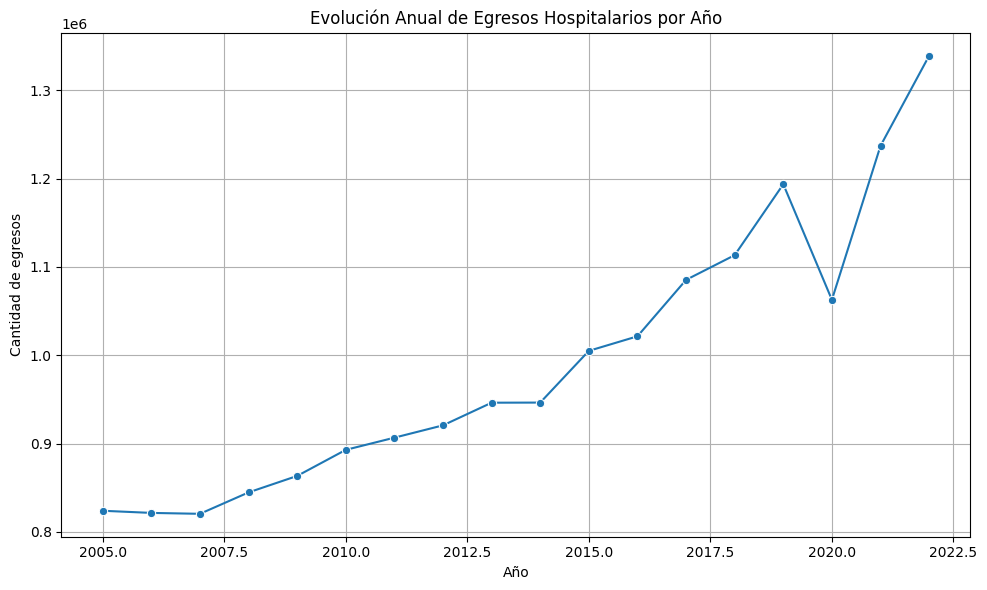

In [ ]:
plt.figure(figsize=(10,6)) #creamos el gráfico
sns.lineplot(data=egresos_por_anio, x='anio', y='egresos', marker='o')
plt.title('Evolución Anual de Egresos Hospitalarios por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de egresos')
plt.grid(True)
plt.tight_layout()
plt.show()

2) Evolución del Porcentaje de Ocupación de Camas: Nos muestra cómo ha variado, año a año, el uso efectivo de las camas disponibles en los hospitales. Este indicador refleja la presión sobre los servicios de internación. Un valor alto sostenido puede indicar saturación, mientras que uno muy bajo puede reflejar subutilización. Analizar su cambio en el tiempo permite evaluar la eficiencia del sistema y planificar recursos. Es clave en la gestión hospitalaria, especialmente en contextos de alta demanda.

In [ ]:
# Agrupamos por año y calculamos el promedio del porcentaje de ocupación
ocupacion_anual = archivo.groupby('anio')['porcentaje_ocupacion'].mean().reset_index()

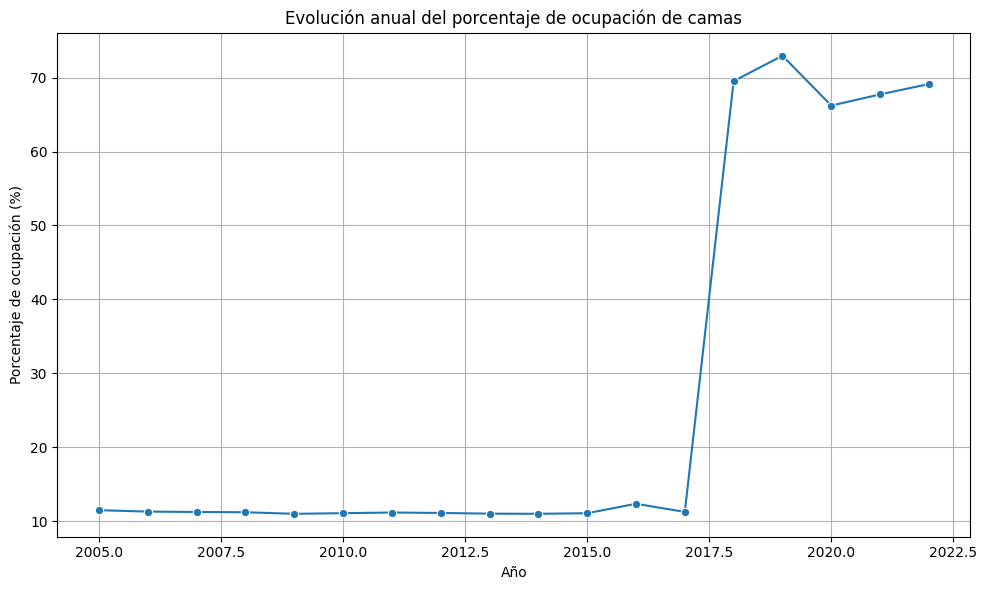

In [ ]:
# Creamos el gráfico
plt.figure(figsize=(10,6))
sns.lineplot(data=ocupacion_anual, x='anio', y='porcentaje_ocupacion', marker='o')
plt.title('Evolución anual del porcentaje de ocupación de camas')
plt.xlabel('Año')
plt.ylabel('Porcentaje de ocupación (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

#El aumento en el porcentaje de ocupación durante 2020-2021 se debe al impacto de la pandemia de COVID-19, que elevó la demanda de internaciones.

COMPARACIÓN POR MUNICIPIO O REGIÓN SANITARIA

1) Gráfico de barras de consultas médicas por región sanitaria: Nos muestra la distribución de la demanda de atención médica por región sanitaria. Permite identificar qué zonas tienen mayor carga asistencial. Es útil para planificar recursos y fortalecer áreas con alta demanda.

In [ ]:
# Consultamos las regiones sanitarias únicas en el dataset
regiones_sanitarias = archivo['region_sanitaria'].unique()

print(regiones_sanitarias)

['I' 'II' 'III' 'IV' 'IX' 'V' 'VI' 'VII' 'VIII' 'X' 'XI' 'XII']


<ipython-input-14-1bb396530b0f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=consultas_por_region, x='region_sanitaria', y='consultas_medicas', palette='viridis')


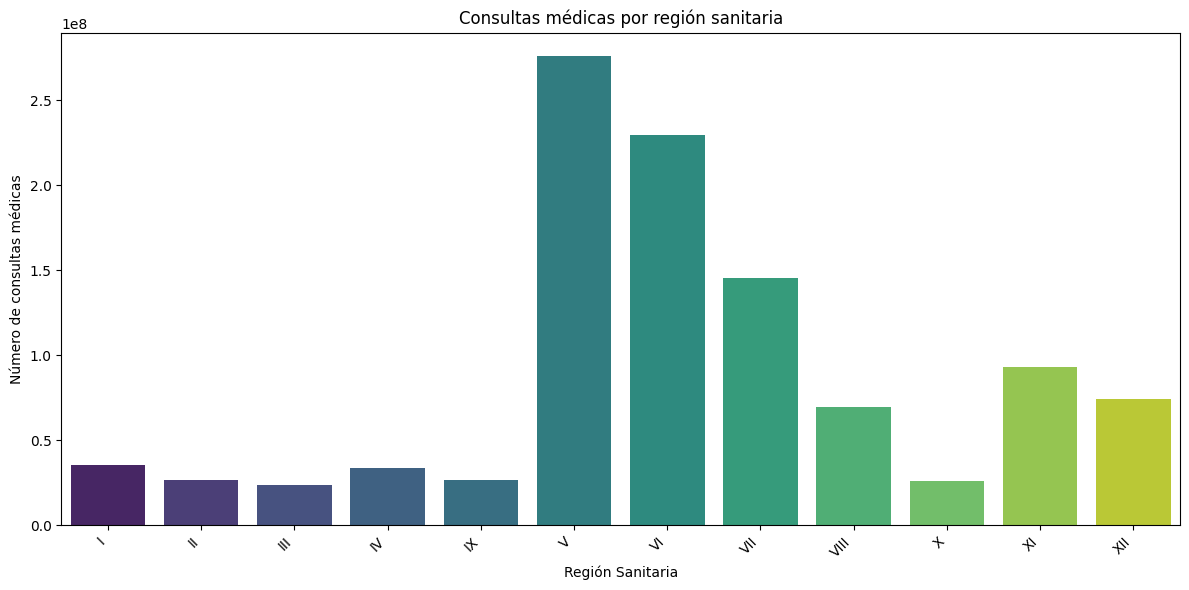

In [ ]:
consultas_por_region = archivo.groupby('region_sanitaria')['consultas_medicas'].sum().reset_index()

# Creamos el gráfico de barras
plt.figure(figsize=(12,6))
sns.barplot(data=consultas_por_region, x='region_sanitaria', y='consultas_medicas', palette='viridis')

plt.title('Consultas médicas por región sanitaria')
plt.xlabel('Región Sanitaria')
plt.ylabel('Número de consultas médicas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Buscamos la Región Sanitaria con mayor Consultas médicas
region_max_consultas = consultas_por_region.loc[consultas_por_region['consultas_medicas'].idxmax()]

print(f"La región sanitaria con la máxima cantidad de camas es: {region_max_consultas['region_sanitaria']}")
print(f"Total de camas disponibles: {region_max_consultas['consultas_medicas']}")

La región sanitaria con la máxima cantidad de camas es: V
Total de camas disponibles: 275986357.0


In [ ]:
# Agrupamos por región sanitaria y sumar las consultas médicas
consultas_por_region = archivo.groupby('region_sanitaria')['consultas_medicas'].sum().reset_index()

# Ordenamos las regiones por la cantidad de consultas médicas de mayor a menor
consultas_por_region = consultas_por_region.sort_values(by='consultas_medicas', ascending=False)

# Se muestran la suma de consultas médicas para cada región sanitaria
print(consultas_por_region)

   region_sanitaria  consultas_medicas
5                 V        275986357.0
6                VI        229432487.0
7               VII        145474360.0
10               XI         92908336.0
11              XII         74027736.0
8              VIII         69661420.0
0                 I         35505342.0
3                IV         33898574.0
4                IX         26754184.0
1                II         26531903.0
9                 X         25795718.0
2               III         23438181.0


2) Distribución del Porcentaje de Ocupación por Tipo de Dependencia: EL grafico nos muestra de que manera varía el porcentaje de ocupación de camas entre los distintos Tipos de Dependencias. Se visualizan valores atípicos del uso de camas y se compara la mediana según el tipo de Dependencia.

In [26]:
#Mostramos los Tipos de Dependencias existentes
archivo['dependencia'].unique()

array(['Municipal', 'Provincial', 'Nacional'], dtype=object)

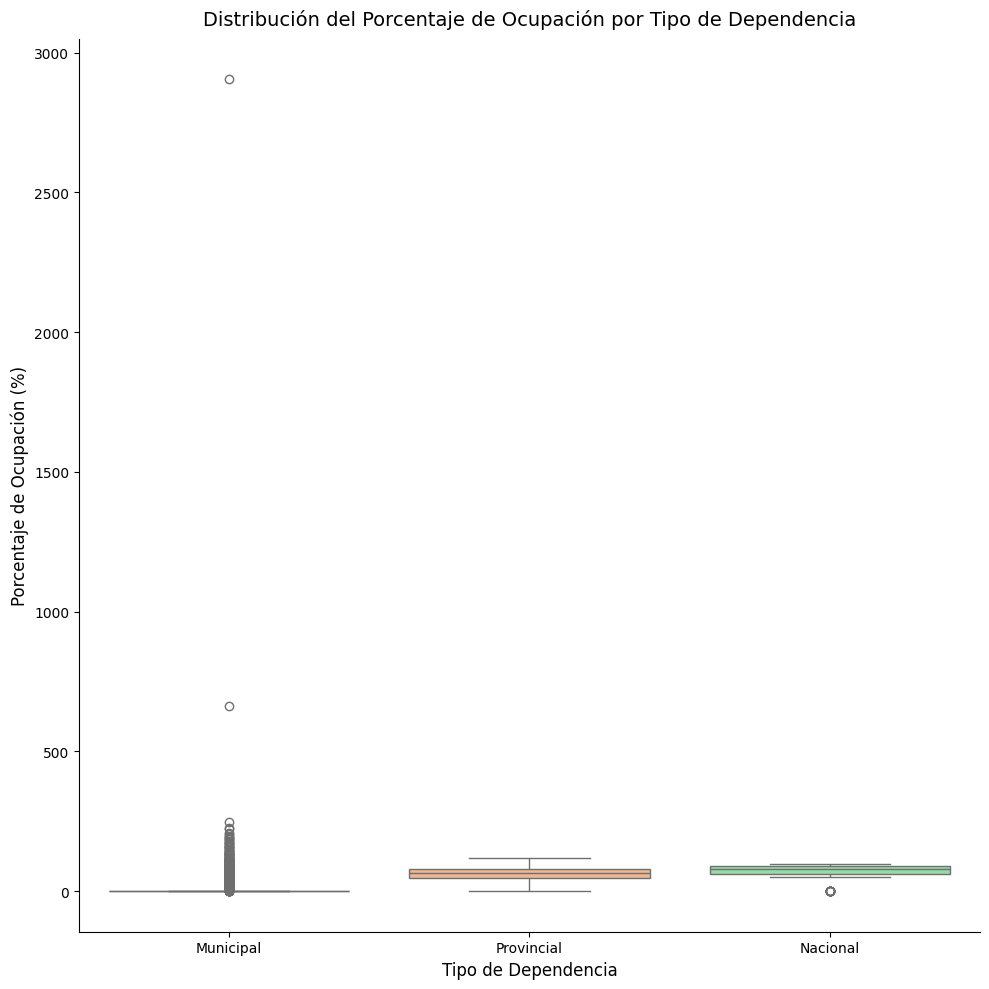

In [25]:
plt.figure(figsize=(10, 10))

sns.boxplot(x="dependencia", y="porcentaje_ocupacion", data=archivo, hue="dependencia", palette="pastel", legend=False)

plt.title('Distribución del Porcentaje de Ocupación por Tipo de Dependencia', fontsize=14, pad=10)
plt.xlabel('Tipo de Dependencia', fontsize=12)
plt.ylabel('Porcentaje de Ocupación (%)', fontsize=12)

sns.despine()
plt.tight_layout()
plt.show()

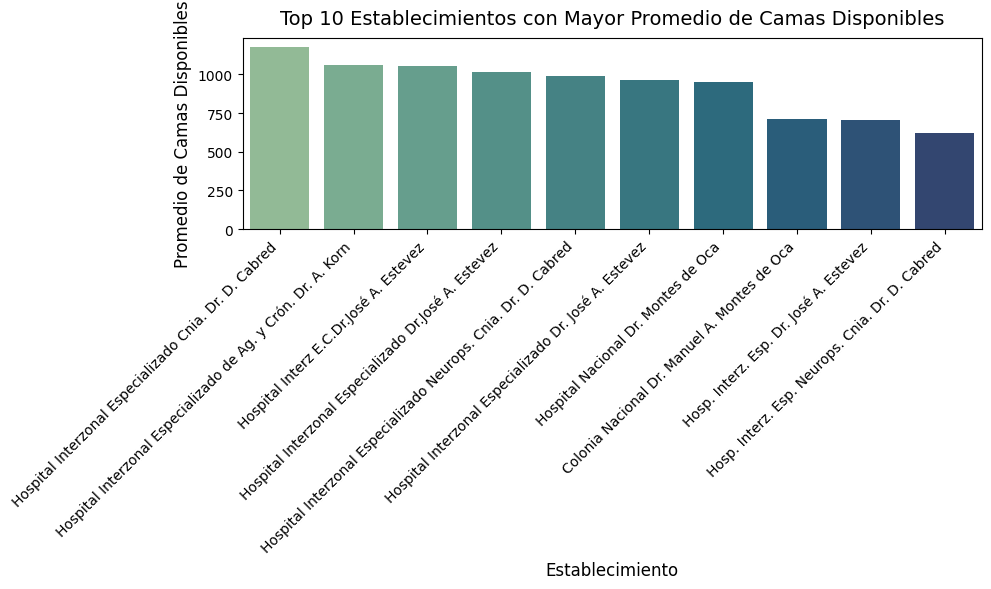

In [34]:
# Agrupamos por establecimiento y calculamos el promedio de camas disponibles
camas_promedio = archivo.groupby('establecimiento_nombre')['promedio_camas_disponibles'].mean()

# Seleccionamos los 10 establecimientos con mayor promedio de camas disponibles
top10 = camas_promedio.sort_values(ascending=False).head(10)

# Gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(
    x=top10.index,
    y=top10.values,
    palette='crest',
    hue=top10.index,
    dodge=False
)

plt.title('Top 10 Establecimientos con Mayor Promedio de Camas Disponibles', fontsize=14, pad=10)
plt.xlabel('Establecimiento', fontsize=12)
plt.ylabel('Promedio de Camas Disponibles', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

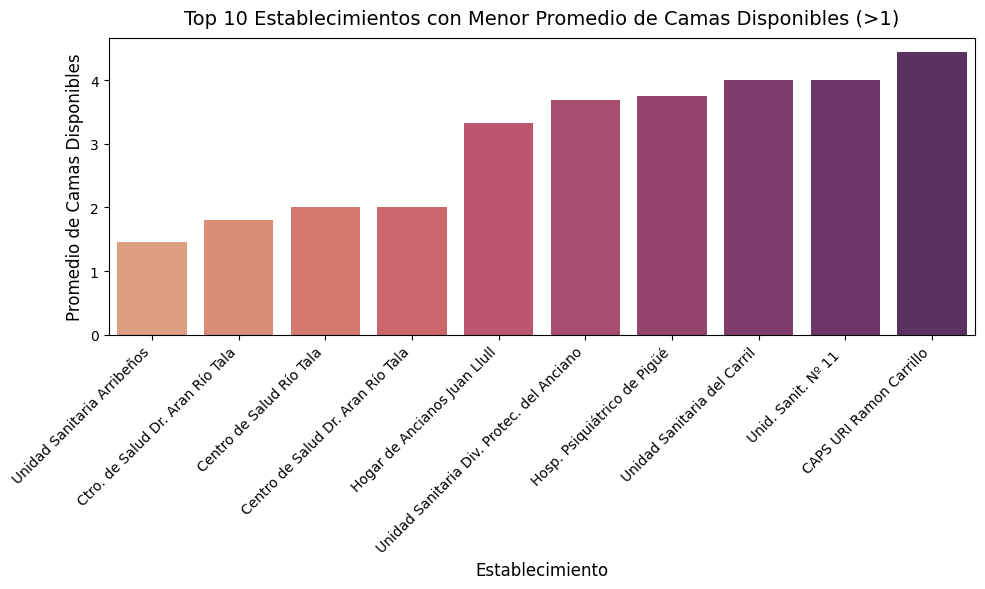

In [33]:
# Agrupamos por establecimiento y calculamos el promedio de camas disponibles
camas_promedio = archivo.groupby('establecimiento_nombre')['promedio_camas_disponibles'].mean()

# Filtramos solo los establecimientos con promedio > 1
camas_filtrado = camas_promedio[camas_promedio > 1]

# Seleccionamos los 10 con menor promedio entre los que cumplen la condición
bottom10_filtrado = camas_filtrado.sort_values(ascending=True).head(10)

# Gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(
    x=bottom10_filtrado.index,
    y=bottom10_filtrado.values,
    palette='flare',
    hue=bottom10_filtrado.index,
    dodge=False
)

plt.title('Top 10 Establecimientos con Menor Promedio de Camas Disponibles (>1)', fontsize=14, pad=10)
plt.xlabel('Establecimiento', fontsize=12)
plt.ylabel('Promedio de Camas Disponibles', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Diagrama de dispersión entre porcentaje de ocupación y promedio de camas disponibles:

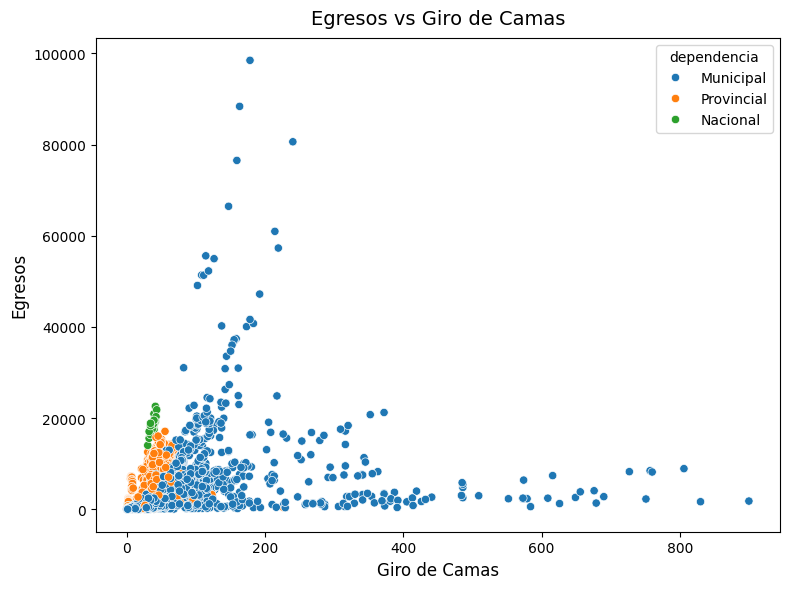

In [46]:
plt.figure(figsize=(8, 6))

# Diagrama de dispersión
sns.scatterplot(data=archivo, x='giro_de_camas', y='egresos', hue='dependencia')

plt.title('Egresos vs Giro de Camas', fontsize=14, pad=10)
plt.xlabel('Giro de Camas', fontsize=12)
plt.ylabel('Egresos', fontsize=12)

plt.tight_layout()
plt.show()

Lo que muestra este gráfico:
Ejes del gráfico:

Eje X: Muestra el giro de camas, que es el número de egresos (pacientes dados de alta) en relación con el número de camas disponibles. Esta variable nos da una idea de la rotación de pacientes en un hospital o establecimiento de salud.

Eje Y: Muestra los egresos, es decir, el número total de pacientes dados de alta durante un período de tiempo determinado.

Segmentación por dependencia:

Al usar el parámetro hue='dependencia', los puntos en el gráfico se segmentan por el tipo de dependencia del establecimiento, por ejemplo, hospitales públicos y privados, o diferentes tipos de gestión (pública, privada, etc.). Esto permite ver si hay diferencias en las relaciones entre giro de camas y egresos dependiendo de la categoría de dependencia.

Cada grupo tendrá un color distinto para facilitar la comparación visual.

¿Qué puedes interpretar de este gráfico?
Relación entre Giro de Camas y Egresos: Si los puntos muestran una tendencia ascendente, puede indicar que los establecimientos con un mayor giro de camas también tienen más egresos (es decir, que los hospitales con mayor rotación de camas también tienen un mayor número de pacientes dados de alta).

Comparación entre dependencias: Si las categorías de dependencia (público, privado, etc.) muestran distribuciones distintas de los puntos, puedes observar si los hospitales públicos tienen una mayor rotación de camas que los privados, o viceversa. También podría reflejar si un tipo de establecimiento tiene una mayor capacidad de alta de pacientes, o si tienden a tener más camas ocupadas durante periodos largos.

Outliers: Puedes identificar puntos atípicos que tienen un giro de camas alto pero un número bajo de egresos, lo cual podría indicar un comportamiento atípico en un establecimiento. También puede ser que haya hospitales con un giro de camas bajo pero muchos egresos, lo que podría sugerir que están dando altas a muchos pacientes sin mucha rotación de camas.

Ejemplo de cómo se verían los puntos:
Si un establecimiento tiene muchos egresos y un alto giro de camas, los puntos estarán más hacia la parte superior derecha del gráfico.

Si un establecimiento tiene menos egresos y menor giro de camas, los puntos estarán hacia la parte inferior izquierda.

¿Por qué es útil este gráfico?
Relación entre la rotación de camas y egresos: Ayuda a entender si un establecimiento con mayor número de camas disponibles o más rotación de camas tiene una mayor cantidad de egresos, lo cual podría estar relacionado con su eficiencia o capacidad de atender a pacientes.

Comparar tipos de establecimientos: Al segmentar por dependencia, puedes observar diferencias entre establecimientos públicos y privados o de distintas categorías de gestión.

Este gráfico es útil para evaluar el rendimiento de los hospitales en términos de rotación de camas y capacidad de egresos, y cómo estas métricas se comportan en diferentes tipos de hospitales o clínicas.

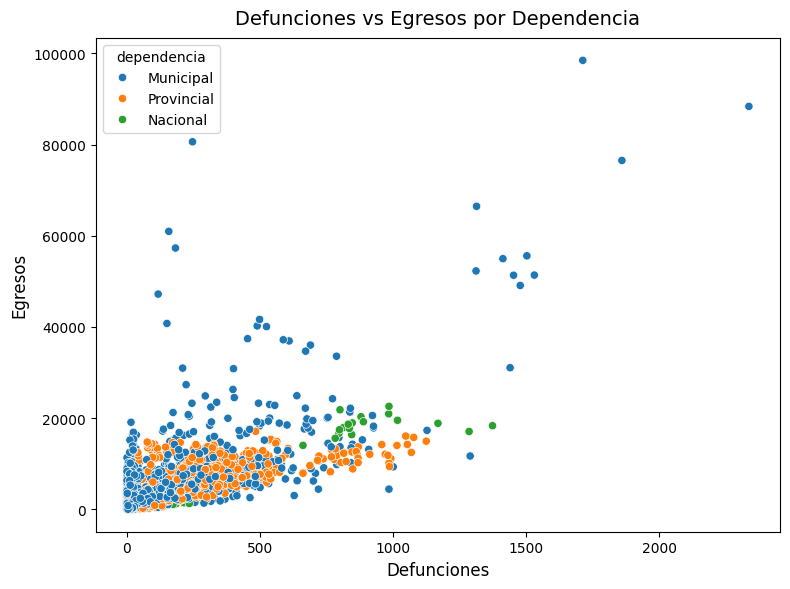

In [44]:
plt.figure(figsize=(8, 6))

# Diagrama de dispersión con hue por tipo de establecimiento
sns.scatterplot(data=archivo, x='defunciones', y='egresos', hue='dependencia')

plt.title('Defunciones vs Egresos por Dependencia', fontsize=14, pad=10)
plt.xlabel('Defunciones', fontsize=12)
plt.ylabel('Egresos', fontsize=12)

plt.tight_layout()
plt.show()

¿Qué muestra este gráfico?
Defunciones en el eje X y Egresos en el eje Y. Este gráfico puede ayudarte a identificar si los establecimientos con mayor número de defunciones también tienen un mayor número de egresos. Esto podría indicar que los establecimientos con más pacientes dados de alta también tienen más defunciones, o si no hay correlación.

Alternativa con hue (por tipo de establecimiento):
Si deseas incluir un parámetro adicional como tipo de establecimiento o dependencia para observar si existen diferencias significativas entre estos grupos, puedes hacerlo con el parámetro hue: